In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Wear time analysis - Device Actigraph
* Wear time expressed in hours/day
* sph = steps per hour
* Subjects without KAFO data have the SCO as baseline device

In [3]:
weartimes = pd.read_excel('./WearTime_Device_Formatted.xlsx')
weartimes = weartimes[weartimes['SubjID']!='CBR14'] #Drop Subj 14

In [4]:
weartimes.head(4)

,Days,SubjID,Condition,Wear Time,Age,Baseline device,Baseline Device Yrs,Predicate device,Predicate Device Yrs,Diagnosis
0,1.0,CBR11,SCO-Device,86.7,35,KAFO,5.0,KAFO,5.0,traumatic T-12 ASIA D SCI
1,2.0,CBR11,SCO-Device,20.4,35,KAFO,5.0,KAFO,5.0,traumatic T-12 ASIA D SCI
2,3.0,CBR11,SCO-Device,0.0,35,KAFO,5.0,KAFO,5.0,traumatic T-12 ASIA D SCI
3,4.0,CBR11,SCO-Device,0.0,35,KAFO,5.0,KAFO,5.0,traumatic T-12 ASIA D SCI


In [5]:
#express weartime in hours
weartimes['Wear Time'] = weartimes['Wear Time']*24/100

In [6]:
weartimes.loc[weartimes['Condition']=='SCO-Device','Condition'] = 'SCO'
weartimes.loc[weartimes['Condition']=='CBR-Device','Condition'] = 'CBR'
weartimes.loc[weartimes['Condition']=='KAFO-Device','Condition'] = 'Baseline'

In [7]:
weartimes = weartimes.sort_values('SubjID',axis=0)
weartimes.head()

,Days,SubjID,Condition,Wear Time,Age,Baseline device,Baseline Device Yrs,Predicate device,Predicate Device Yrs,Diagnosis
1164,19.0,CBR08,SCO,16.128,41,KAFO,39.0,KAFO,39.0,poliomyelitis
1144,34.0,CBR08,CBR,0.120,41,KAFO,39.0,KAFO,39.0,poliomyelitis
1145,35.0,CBR08,CBR,3.792,41,KAFO,39.0,KAFO,39.0,poliomyelitis
1146,1.0,CBR08,SCO,2.760,41,KAFO,39.0,KAFO,39.0,poliomyelitis
1147,2.0,CBR08,SCO,0.000,41,KAFO,39.0,KAFO,39.0,poliomyelitis


In [8]:
weartimes['Condition'].unique()

array(['SCO', 'CBR', 'Baseline'], dtype=object)

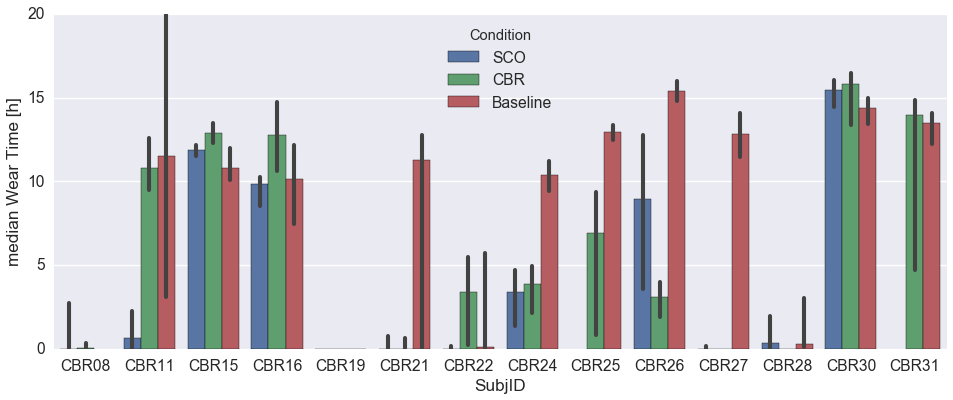

In [9]:
#error bars indicate 95% confidence interval by bootstrap
sns.set_context('talk',font_scale=1.2)
from numpy import median
plt.figure(figsize=(16,6))
sns.barplot(x='SubjID',y='Wear Time',hue='Condition',data=weartimes,ci=95,estimator=median)
plt.ylabel('median Wear Time [h]')

Most subjects had a median daily KAFO wear time above 40% (baseline). Most People who wore either the CBR or the SCO for more than 40% of the day has a comparable wear time with their baseline device (KAFO), thus suggesting that they used the CBR at least as much as their baselined device (CBR11,16,30,31). Others show a trend where the baseline device is used significantly more than either the SCO or the CBR (21,24,25,26,27).

** NOTE: CBR 11 only has 2 data points for the Baseline device wear time - possibly remove **

** Note that wear time includes both sitting and mobility**

# Steps per hour analysis - Device Actigraph


In [10]:
Steps = pd.read_csv('./Summary Steps.csv')
print(len(Steps))
Steps.head()

1677


,Subject,SubjID,Brace,Actigraph,Date,Day of Week,Day of Week Num,Steps Counts,Steps Per Minute,Age,Baseline device,Baseline Device Yrs,Predicate device,Predicate Device Yrs,Diagnosis
0,CBR11_home_cbrace_device,11,CBR,Device,NaN,Wednesday,3,646,1.2,35.0,KAFO,5.0,KAFO,5.0,traumatic T-12 ASIA D SCI
1,CBR11_home_cbrace_device,11,CBR,Device,NaN,Thursday,4,1710,5.3,35.0,KAFO,5.0,KAFO,5.0,traumatic T-12 ASIA D SCI
2,CBR11_home_cbrace_device,11,CBR,Device,NaN,Friday,5,1020,2.5,35.0,KAFO,5.0,KAFO,5.0,traumatic T-12 ASIA D SCI
3,CBR11_home_cbrace_device,11,CBR,Device,NaN,Saturday,6,1357,2.1,35.0,KAFO,5.0,KAFO,5.0,traumatic T-12 ASIA D SCI
4,CBR11_home_cbrace_device,11,CBR,Device,NaN,Sunday,7,1665,3.3,35.0,KAFO,5.0,KAFO,5.0,traumatic T-12 ASIA D SCI


In [11]:
Steps = Steps[Steps['Steps Per Minute']!=0] #remove 0s from steps per hour

In [12]:
Steps.loc[Steps['Brace']=='KAFO','Brace'] = 'Baseline'
Steps['Steps Per Hour'] = Steps['Steps Per Minute']*60 

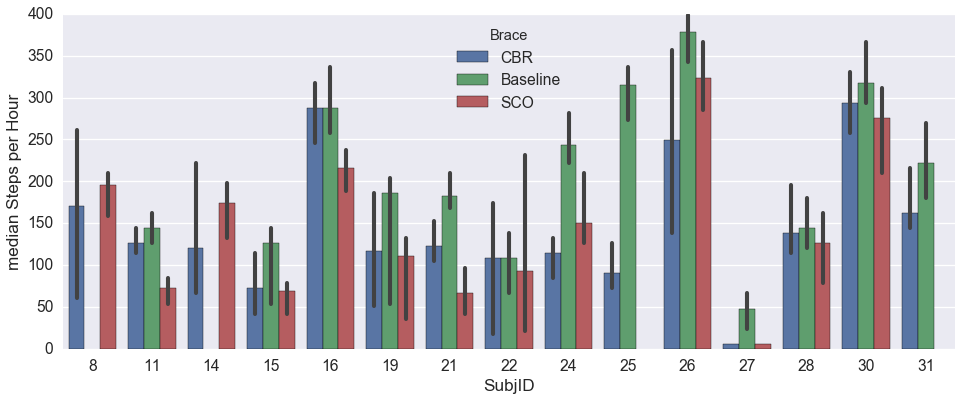

In [13]:
plt.figure(figsize=(16,6))
sns.barplot(data=Steps,x='SubjID',y='Steps Per Hour',estimator=median,hue='Brace')
plt.ylabel('median Steps per Hour')

Median Steps taken while wearing the brace look comparable between CBR and baseline for most participants. Exceptions of subjects who took more steps per minute with the CBR are 11,16

# Demographics Analysis

* Median Wear time expressed in hours/day
* sph = steps per hour

In [14]:
from scipy.stats import pearsonr

In [15]:
demographics = pd.read_excel('./Demographics_analysis.xlsx')
demographics.head()

,SubjID,median WT CBR,median WT SCO,median WT Baseline,med sph CBR,med sph SCO,med sph Baseline,y of baseline use,Diagnosis,Short Diagnosis,...,Ncluster CBR,MeanAwayTime CBR,Away/Home Time CBR,Home_WT CBR,Away_WT CBR,Ncluster SCO,MeanAwayTime SCO,Away/Home Time SCO,Home_WT SCO,Away_WT SCO
0,CBR08,0.048,0.000,NaN,171.0,195.0,NaN,39.00,poliomyelitis,poliomyelitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CBR11,10.800,0.648,11.532,126.0,72.0,144.0,5.00,traumatic T-12 ASIA D SCI,SCI,...,0.0,-0.085136,-0.255409,0.151221,0.521152,2.0,-0.172722,-0.391055,0.126550,0.348087
2,CBR15,12.876,11.844,10.776,72.0,69.0,126.0,0.50,West Nile encephalitis,other,...,7.0,0.164986,2.572308,-0.393580,-0.774352,-1.0,-0.013593,-0.119056,0.011352,0.086319
3,CBR16,12.768,9.816,10.128,288.0,216.0,288.0,1.00,peripheral neuropathy,other,...,-3.0,0.052646,-0.061229,0.024939,-0.048250,-2.0,0.017994,-0.057033,0.044296,0.033655
4,CBR19,0.000,0.000,0.000,117.0,111.0,186.0,0.08,poliomyelitis,poliomyelitis,...,0.0,-0.146621,-0.293243,0.001750,-0.116212,-1.0,-0.166035,-0.340787,0.026098,0.210914


In [16]:
len(demographics.SubjID.unique())

14

In [17]:
demographics['WT CBR-Baseline'] = demographics['median WT CBR']-demographics['median WT Baseline']
demographics['WT SCO-Baseline'] = demographics['median WT SCO']-demographics['median WT Baseline']

In [18]:
demographics['sph CBR-Baseline'] = demographics['med sph CBR'] - demographics['med sph Baseline']
demographics['sph SCO-Baseline'] = demographics['med sph SCO'] - demographics['med sph Baseline']

In [19]:
len(demographics.SubjID.unique())

14

## Correlation between difference in median wear time (WT difference) between the two devices (CBR and baseline) and years of baseline device use

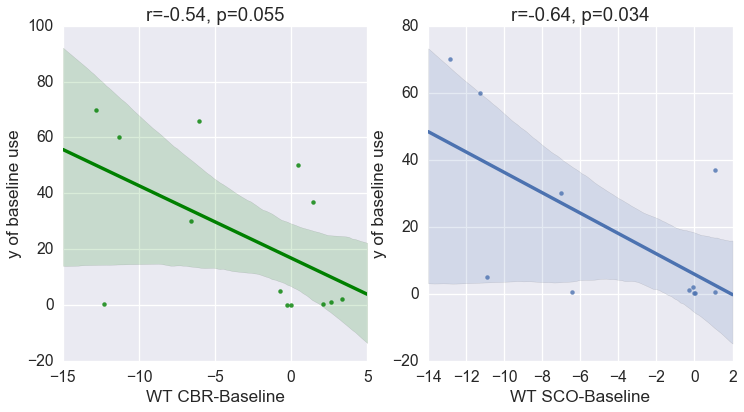

In [20]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
sns.regplot(x='WT CBR-Baseline',y='y of baseline use',data=demographics,label='CBR',ax=ax1,color='g')
xy = demographics.loc[~demographics['WT CBR-Baseline'].isnull(),['WT CBR-Baseline','y of baseline use']]
x = xy['WT CBR-Baseline']; y = xy['y of baseline use']
r,p=pearsonr(x,y)
ax1.set_title('r=%.2f, p=%.3f'%(r,p))

ax2 = fig.add_subplot(122)
sns.regplot(x='WT SCO-Baseline',y='y of baseline use',data=demographics,label='SCO',ax=ax2)
xy = demographics.loc[~demographics['WT SCO-Baseline'].isnull(),['WT SCO-Baseline','y of baseline use']]
x = xy['WT SCO-Baseline']; y = xy['y of baseline use']
r,p=pearsonr(x,y)
ax2.set_title('r=%.2f, p=%.3f'%(r,p))

** x-axis = Wear Time difference = (median wear time CBR/SCO - median wear time baseline device)**

** Positive values on x indicate preference to wear the CBR (SCO) device over the baseline device **

**Trend showing that participants with few years of baseline device use tended to wear the CBR (or SCO) at least as much or more than their baseline device (WT difference > 0)**

## Correlation between median steps per hour difference and years of baseline device use

In [21]:
# sns.jointplot(x='spm difference',y='y of baseline use',data=demographics)

In [22]:
xy = demographics.loc[~demographics['sph SCO-Baseline'].isnull(),['sph SCO-Baseline','y of baseline use']]

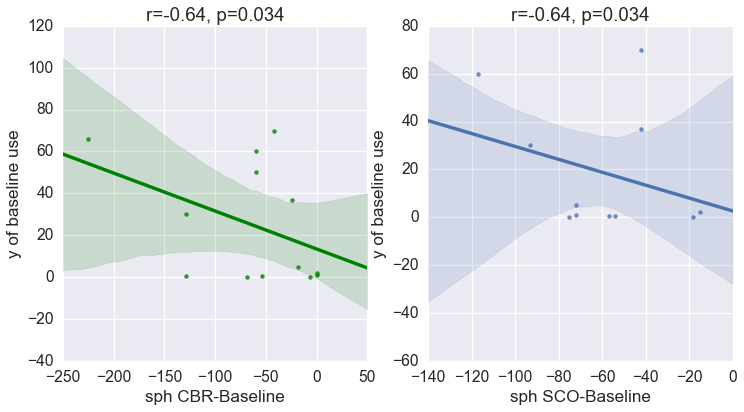

In [23]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
sns.regplot(x='sph CBR-Baseline',y='y of baseline use',data=demographics,label='CBR',ax=ax1,color='g')
# r,p=pearsonr(demographics['sph CBR-Baseline'].values,demographics['y of baseline use'].values)
ax1.set_title('r=%.2f, p=%.3f'%(r,p))

ax2 = fig.add_subplot(122)
sns.regplot(x='sph SCO-Baseline',y='y of baseline use',data=demographics,label='SCO',ax=ax2)
xy = demographics.loc[~demographics['sph SCO-Baseline'].isnull(),['sph SCO-Baseline','y of baseline use']]
x = xy['sph SCO-Baseline']; y = xy['y of baseline use']
# r,p=pearsonr(x.values,y.values)
ax2.set_title('r=%.2f, p=%.3f'%(r,p))

** x-axis = Median Steps per hour (sph) difference = (median sph CBR (SCO) - median sph baseline device)**

** Positive values on x indicate preference to wear the CBR (SCO) device over the baseline device **


** No significant trend. Participants do not seem to take more steps while wearing the CBR if they have not been using their baseline device for longer periods of time **

# Correlations using GPS data

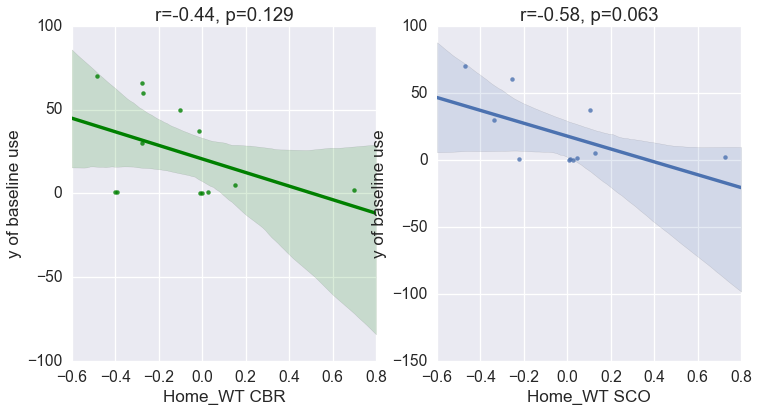

In [24]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
sns.regplot(x='Home_WT CBR',y='y of baseline use',data=demographics,label='CBR',ax=ax1,color='g')
xy = demographics.loc[~demographics['Home_WT CBR'].isnull(),['Home_WT CBR','y of baseline use']]
x = xy['Home_WT CBR']; y = xy['y of baseline use']
r,p=pearsonr(x,y)
ax1.set_title('r=%.2f, p=%.3f'%(r,p))

ax2 = fig.add_subplot(122)
sns.regplot(x='Home_WT SCO',y='y of baseline use',data=demographics,label='SCO',ax=ax2)
xy = demographics.loc[~demographics['Home_WT SCO'].isnull(),['Home_WT SCO','y of baseline use']]
x = xy['Home_WT SCO']; y = xy['y of baseline use']
r,p=pearsonr(x,y)
ax2.set_title('r=%.2f, p=%.3f'%(r,p))

(WT_CBR_Home/Total_Home) - (WT_Baseline_Home/Total_Home)

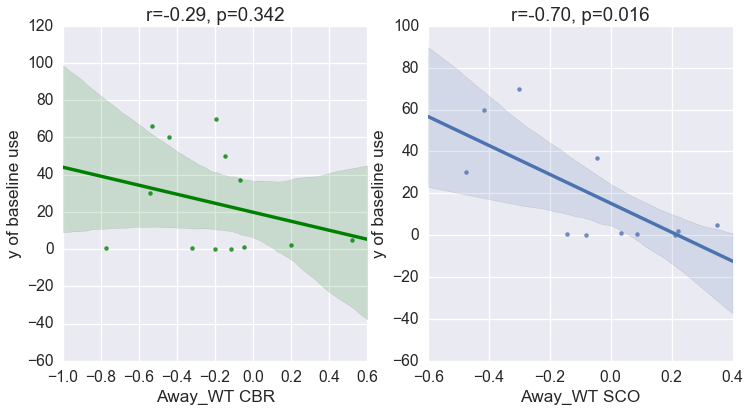

In [25]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
sns.regplot(x='Away_WT CBR',y='y of baseline use',data=demographics,label='CBR',ax=ax1,color='g')
xy = demographics.loc[~demographics['Away_WT CBR'].isnull(),['Away_WT CBR','y of baseline use']]
x = xy['Away_WT CBR']; y = xy['y of baseline use']
r,p=pearsonr(x,y)
ax1.set_title('r=%.2f, p=%.3f'%(r,p))

ax2 = fig.add_subplot(122)
sns.regplot(x='Away_WT SCO',y='y of baseline use',data=demographics,label='SCO',ax=ax2)
xy = demographics.loc[~demographics['Away_WT SCO'].isnull(),['Away_WT SCO','y of baseline use']]
x = xy['Away_WT SCO']; y = xy['y of baseline use']
r,p=pearsonr(x,y)
ax2.set_title('r=%.2f, p=%.3f'%(r,p))

mean_i(WT_CBR_Away_i/Total_Away_i) - mean_j(WT_Baseline_away_j/Total_Away_j) (i=cluster_CBR, j=cluster_SCO)

## Correlation between participants' age and difference in median wear time between CBR and basline device

In [26]:
# sns.jointplot(x='WT difference',y='Age',data=demographics)

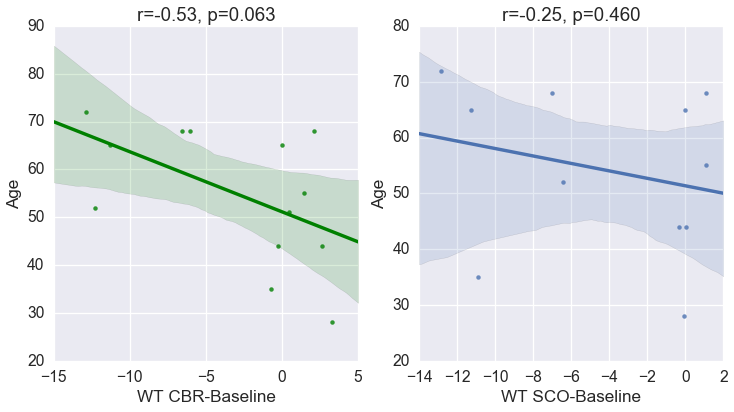

In [27]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
sns.regplot(x='WT CBR-Baseline',y='Age',data=demographics,label='CBR',ax=ax1,color='g')
xy = demographics.loc[~demographics['WT CBR-Baseline'].isnull(),['WT CBR-Baseline','Age']]
x = xy['WT CBR-Baseline']; y = xy['Age']
r,p=pearsonr(x,y)
ax1.set_title('r=%.2f, p=%.3f'%(r,p))

ax2 = fig.add_subplot(122)
sns.regplot(x='WT SCO-Baseline',y='Age',data=demographics,label='SCO',ax=ax2)
xy = demographics.loc[~demographics['WT SCO-Baseline'].isnull(),['WT SCO-Baseline','Age']]
x = xy['WT SCO-Baseline']; y = xy['Age']
r,p=pearsonr(x,y)
ax2.set_title('r=%.2f, p=%.3f'%(r,p))

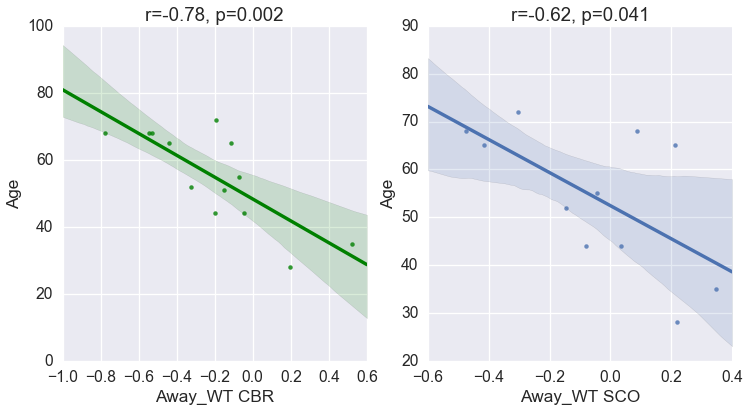

In [28]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
sns.regplot(x='Away_WT CBR',y='Age',data=demographics,label='CBR',ax=ax1,color='g')
xy = demographics.loc[~demographics['Away_WT CBR'].isnull(),['Away_WT CBR','Age']]
x = xy['Away_WT CBR']; y = xy['Age']
r,p=pearsonr(x,y)
ax1.set_title('r=%.2f, p=%.3f'%(r,p))

ax2 = fig.add_subplot(122)
sns.regplot(x='Away_WT SCO',y='Age',data=demographics,label='SCO',ax=ax2)
xy = demographics.loc[~demographics['Away_WT SCO'].isnull(),['Away_WT SCO','Age']]
x = xy['Away_WT SCO']; y = xy['Age']
r,p=pearsonr(x,y)
ax2.set_title('r=%.2f, p=%.3f'%(r,p))

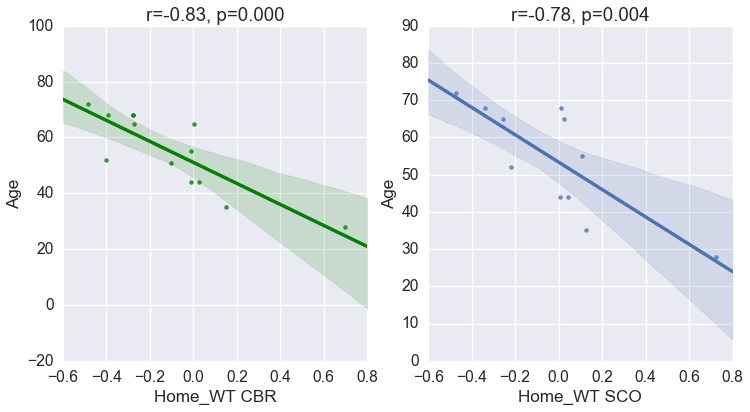

In [29]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
sns.regplot(x='Home_WT CBR',y='Age',data=demographics,label='CBR',ax=ax1,color='g')
xy = demographics.loc[~demographics['Home_WT CBR'].isnull(),['Home_WT CBR','Age']]
x = xy['Home_WT CBR']; y = xy['Age']
r,p=pearsonr(x,y)
ax1.set_title('r=%.2f, p=%.3f'%(r,p))

ax2 = fig.add_subplot(122)
sns.regplot(x='Home_WT SCO',y='Age',data=demographics,label='SCO',ax=ax2)
xy = demographics.loc[~demographics['Home_WT SCO'].isnull(),['Home_WT SCO','Age']]
x = xy['Home_WT SCO']; y = xy['Age']
r,p=pearsonr(x,y)
ax2.set_title('r=%.2f, p=%.3f'%(r,p))

(WT_CBR_Home/Total_Home) - (WT_Baseline_Home/Total_Home)

** There is a significant negative correlation between the 2 variables. Younger people tend to wear the CBR as much (or more) as they wear their baseline device **

## Correlation between type of diagnosis and difference in wear time between CBR and baseline device

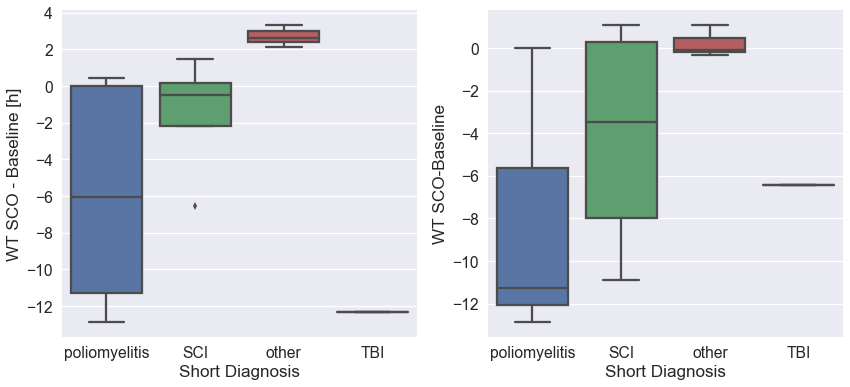

In [63]:
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(121)
sns.boxplot(x='Short Diagnosis',y='WT CBR-Baseline',data=demographics,ax=ax1)
ax1.set_ylabel('WT CBR - Baseline [h]')
ax2 = fig.add_subplot(122)
sns.boxplot(x='Short Diagnosis',y='WT SCO-Baseline',data=demographics,ax=ax2)
ax1.set_ylabel('WT SCO - Baseline [h]')

** Positive values indicate preference at wearing the CBR (SCO) device over the baseline device** 

** Participants with polio seem to favor their baseline device. Participants with SCI have median difference of 0, showing same preference for both devices. Other prognosis (neuropathy, nerve injury, encephalitis) seeem to have prefence for the CBR, but the small sample size does not allow to infer any statistical significance. Furthermore, there is likely a correlation between the participants' age and the diagnosis, which plays a role in preferring a device over the other (see previous correlation with age). **